In [1]:
# Create our VLM application and load some urls to process
from vlm_apps.application import Application
from vlm.utils import download_image

app_name = 'sports.nfl'
app = Application.get(app_name)

URLS = [
    "https://static.www.nfl.com/image/private/t_editorial_landscape_12_desktop/league/osfac1nvcxkjdfa5yhtn",
    "https://i.insider.com/5e24c8ba62fa813a7d022fe3?width=1200&format=jpeg",
    "https://pbs.twimg.com/amplify_video_thumb/1485009987269128195/img/JIIA0Cea5o1LpkHZ.jpg:large",
    "https://static.www.nfl.com/image/private/t_editorial_landscape_12_desktop/league/d33yyhuped2bmobifqoy",
    "https://static.www.nfl.com/image/upload/t_editorial_landscape_12_desktop/league/hid31t8byzxfpz0vtak4",
    "https://cdn-images-1.medium.com/max/800/1*eluBF0MOTAqNCSc4vCEXmQ.png",
    "https://cdn.geekwire.com/wp-content/uploads/2017/12/Screen-Shot-2017-09-28-at-5.50.14-PM-1260x700-630x350.png",
    "https://pbs.twimg.com/amplify_video_thumb/1738699907484065792/img/s-pzq7wLBByXvsuX.jpg",
]

frames = (download_image(_url) for _url in URLS)

2024-03-27 16:13:11.499 | DEBUG    | vlm.constants:<module>:8 - VLM_HOME: /Users/scottloftin/.vlm


In [2]:
# Init our airtable API
import os
from pyairtable import Api

airtable_app_id = os.getenv("AIRTABLE_APP_ID")
airtable_table_name = os.getenv("AIRTABLE_TABLE_NAME")
airtable_table_name = 'nfl_plays_cookbook'
airtable_auth = os.getenv("AIRTABLE_AUTH_KEY")
print('init airtable with auth key: ', airtable_auth)
api = Api(api_key=airtable_auth)

init airtable with auth key:  pat0X1VzA8RSsCf9h.679e5ecd9da6ca6d76e2b97bf112b53b39f98ab9b1de19d9fbf74a766155c135


In [3]:
# Create a table based on the response model/schema for nfl plays
base = api.bases()[0]
fields = []
for field in app.response_model.__annotations__.keys():
    fields.append({"description": f"Description for {field}", "name": field, "type": "singleLineText"})

# Catch exception if table already exists and just return it
try:
    table = base.create_table(airtable_table_name, fields)
except Exception:
    table = base.table(airtable_table_name)

Scene Descriptions

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

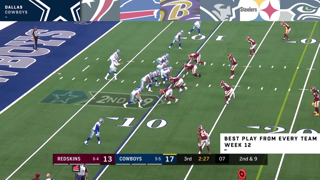

response status code:  200
{'cls_name': 'DocumentPresentation-v1', 'slide': 'The slide shows a still image from an American football game between two teams, with one team lined up in an offensive formation and the other in a defensive stance. The image includes graphical overlays such as team logos, a scoreboard, and additional information about the game situation.', 'title': None, 'page_number': None, 'plots': None, 'tables': None, 'others': [{'cls_name': 'MarkdownBlock', 'markdown': '![Football game situation](image.png)\n\n- **Teams**: Dallas Cowboys vs. Washington Redskins\n- **Score**: Redskins 13 - Cowboys 17\n- **Quarter**: 3rd\n- **Time Left**: 2:27\n- **Down and Distance**: 2nd & 9\n- **Caption**: Best play from every team - Week 12', 'caption': 'Best play from every team - Week 12', 'title': None}]}


response: {'cls_name': 'DocumentPresentation-v1', 'slide': 'The slide shows a still image from an American football
game between two teams, with one team lined up in an offensive formation and the other in a defensive stance. The 
image includes graphical overlays such as team logos, a scoreboard, and additional information about the game 
situation.', 'title': None, 'page_number': None, 'plots': None, 'tables': None, 'others': [{'cls_name': 
'MarkdownBlock', 'markdown': '![Football game situation](image.png)\n\n- **Teams**: Dallas Cowboys vs. Washington 
Redskins\n- **Score**: Redskins 13 - Cowboys 17\n- **Quarter**: 3rd\n- **Time Left**: 2:27\n- **Down and 
Distance**: 2nd & 9\n- **Caption**: Best play from every team - Week 12', 'caption': 'Best play from every team - 
Week 12', 'title': None}]}

Failed to process image:  expected string or bytes-like object, got 'dict'

NameError: name 'response' is not defined

In [4]:
from IPython.display import Markdown, display
from rich import print
from rich.markdown import Markdown
from rich.table import Table

from vlm.utils import describe_image, render_response_as_markdown

# process our urls one by one, updating airtable as we go:
# render as markdown
print(Markdown("## Scene Descriptions"))
print(Markdown("---"))
for _idx, img in enumerate(frames):
    try:
        response = describe_image(
            img,
            prompt=app.prompt,
            response_model=app.response_model,
            model=app.model,
            max_tokens=1024,
            verbose=True,
        )
    except Exception as e:
        print("Failed to process image: ", e)

    # update the airtable record
    # assert table, "Table not created"
    # create record in table for image annotations
    # all_fields = {field : getattr(response, field) for field in response.__annotations__.keys()}
    # table.create(all_fields)

    render_response_as_markdown(response)

print(Markdown(""))